### Quantum Circuit Simulation with Qiskit Aer
---
We will perform following steps:
1. Building a Quantum Circuit
2. Executing Quantum Circuit with different simulators
3. Visualizing the results

In [6]:
import qiskit as q
from math import pi

#### 1. Building a Quantum Circuit

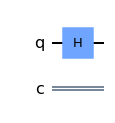

In [21]:
qr = q.QuantumRegister(1, 'q')
cr = q.ClassicalRegister(1, 'c')
circuit = q.QuantumCircuit(qr, cr)

circuit.h(qr)
# circuit.p(pi, q)
# circuit.z(qr)
# circuit.y(qr)
# circuit.ry(pi/2, qr)
# circuit.t(qr)
# circuit.s(qr)

# circuit.measure(qr, cr)
circuit.draw(output='mpl')

#### 2. Executing Quantum Circuit with different simulators

We will perform three types of simulation:
- StateVector Simulation
- Qasm Simulation
- Unitary Simulation

In [22]:
statevector_simulator = q.Aer.get_backend('statevector_simulator')
qasm_simulator = q.Aer.get_backend('qasm_simulator')
unitary_simulator = q.Aer.get_backend('unitary_simulator')

In [23]:
def executeQC(circuit):
    statevector_result = q.execute(circuit, backend = statevector_simulator).result()
    qasm_result = q.execute(circuit, backend = qasm_simulator, shots=2048).result()
    unitary_result = q.execute(circuit, backend = unitary_simulator).result()
    return statevector_result.get_statevector(), qasm_result.get_counts(circuit), unitary_result.get_unitary(circuit, decimals=3)

In [24]:
statevec, count, unitary = executeQC(circuit)
print(f'Current State Vector: {statevec}\nResult Counts: {count}\nUnitary Vector: {unitary}')

Current State Vector: [0.70710678+0.j 0.70710678+0.j]
Result Counts: {'0': 2048}
Unitary Vector: [[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]


#### 3. Visualizing the results

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector

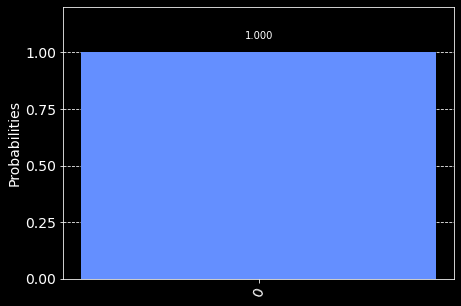

In [26]:
plot_histogram(count)

c:\users\kushp\appdata\local\programs\python\python39\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


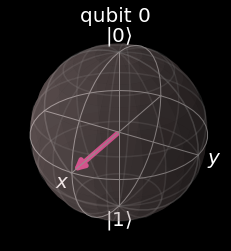

In [27]:
plot_bloch_multivector(statevec)